In [2]:
import os

# List of files to process
files_to_process = [
    'results/files/results_geometry_3k_baseline_direct_20240521_092635.json',
    'results/files/results_geometry_3k_baseline_cot_20240523_004840.json',
    'results/files/results_geometry_3k_finetuned_20240521_102206.json',
    'results/files/results_geometry_3k_finetuned_20240523_162428.json', # 2,100 training samples
    "results/files/results_geometry_3k_baseline_cot_gpto_20240525_161954.json",
    "results/files/results_geometry_3k_TinyLLaVA-3.1B-lora-2_20240526_143150.json",
    "results/files/results_geometry_3k_TinyLLaVA-3.1B-lora-filtered_20240526_144158.json",
    "results/files/results_geometry_3k_TinyLLaVA-3.1B-lora-peano_20240526_151844.json"
]

# Run the results.py script for each file
for file in files_to_process:
    os.system(f'python results/results.py --file "{file}" --key "extracted_answer"')


File processed: results/files/results_geometry_3k_baseline_direct_20240521_092635.json
Accuracy: 23.29%
Total items: 601
Correct/Total: 140/601
File processed: results/files/results_geometry_3k_baseline_cot_20240523_004840.json
Accuracy: 21.80%
Total items: 601
Correct/Total: 131/601
File processed: results/files/results_geometry_3k_finetuned_20240521_102206.json
Accuracy: 27.62%
Total items: 601
Correct/Total: 166/601
File processed: results/files/results_geometry_3k_finetuned_20240523_162428.json
Accuracy: 28.45%
Total items: 601
Correct/Total: 171/601
File processed: results/files/results_geometry_3k_baseline_cot_gpto_20240525_161954.json
Accuracy: 55.91%
Total items: 601
Correct/Total: 336/601
File processed: results/files/results_geometry_3k_TinyLLaVA-3.1B-lora-2_20240526_143150.json
Accuracy: 28.79%
Total items: 601
Correct/Total: 173/601
File processed: results/files/results_geometry_3k_TinyLLaVA-3.1B-lora-filtered_20240526_144158.json
Accuracy: 22.63%
Total items: 601
Correct/T

In [3]:
import json

# Load the JSON data from the files
with open('results/files/results_geometry_3k_baseline_cot_20240523_004840.json', 'r') as file1, \
     open('results/files/results_geometry_3k_baseline_direct_20240521_092635.json', 'r') as file2, \
     open('results/files/results_geometry_3k_finetuned_20240523_162428.json', 'r') as file3, \
     open('results/files/results_geometry_3k_baseline_cot_gpto_20240525_161954.json', 'r') as file4:
    results_geometry_3k_baseline_cot = json.load(file1)
    results_geometry_3k_baseline_direct = json.load(file2)
    results_geometry_3k_finetuned = json.load(file3)
    results_geometry_3k_baseline_cot_gpto = json.load(file4)


In [4]:
import csv

# Use the loaded JSON data from the previous cells
data = {
    "baseline_direct": results_geometry_3k_baseline_direct,
    "baseline_cot": results_geometry_3k_baseline_cot,
    "finetuned": results_geometry_3k_finetuned,
    "gpto": results_geometry_3k_baseline_cot_gpto
}

# Determine the number of questions
num_questions = len(data["baseline_direct"])

# Create the CSV file
with open('results_comparison.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Write the header
    csvwriter.writerow(['question number', 'baseline direct', 'baseline cot', 'finetuned', 'gpto', 'problem_type_goal', 'problem_type_graph'])
    
    # Write the data rows
    for i in range(num_questions):
        row = [i + 1]  # question number
        for key in ["baseline_direct", "baseline_cot", "finetuned", "gpto"]:
            extracted_answer = data[key][i].get("extracted_answer")
            correct_answer = data[key][i].get("answer")
            if extracted_answer == correct_answer:
                row.append(extracted_answer)
            else:
                row.append("")
        # Add problem_type_goal and problem_type_graph to the row
        problem_type_goal = data["baseline_direct"][i].get("problem_type_goal", [])
        problem_type_graph = data["baseline_direct"][i].get("problem_type_graph", [])
        row.append(", ".join(problem_type_goal))
        row.append(", ".join(problem_type_graph))
        csvwriter.writerow(row)


In [5]:
def display_prediction(number, data, show_details=True):
    if 0 <= number < len(data):
        entry = data[number]
        
        if show_details:
            # Display the question
            print(f"Question: {entry['problem_text']}")
            # Display the choices
            choices = entry.get('choices', [])
            if choices:
                print("Choices:")
                for idx, choice in enumerate(choices, start=1):
                    print(f"{idx}. {choice}")
            else:
                print("No choices available.")
            
            # Display the image
            from IPython.display import Image, display
            image_path = f"dataset/eval/geometry_3k/images/{entry['image_id']}.png"
            display(Image(filename=image_path, width=400))
        
        # Display the predicted answer
        print(f"Predicted Answer: {entry['predicted_answer']}")
        
        from IPython.display import display, HTML
        display(HTML(f"<span style='color: green;'>Predicted Extracted Answer: {entry['extracted_answer']}</span>"))
        display(HTML(f"<span style='color: red; font-weight: bold;'>Correct Answer: {entry['answer']}</span>"))
    else:
        print(f"Invalid number: {number}. It should be between 0 and {len(data) - 1}.")


Displaying predictions for question 41 across all datasets:

Dataset: results_geometry_3k_baseline_direct
Question: Find x.
Choices:
1. 60
2. 80
3. 90
4. 120


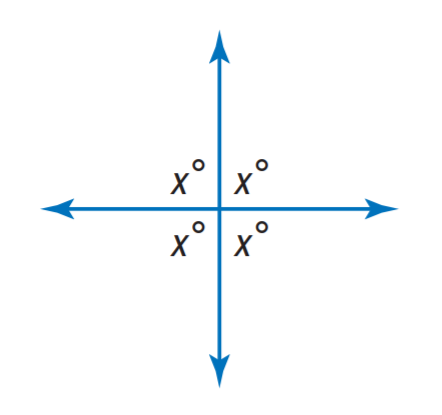

Predicted Answer: The image presents a mathematical problem involving a cross-shaped graph with four intersecting lines. Each line is labeled with a number, and the numbers are arranged in a specific pattern. The numbers are 0, 60, 80, and 120. The task is to find the value of x that satisfies the equation x = 60. This equation is derived from the intersection of the lines labeled with the numbers 0 and 60. The graph is set against a white background, and the lines are colored blue. The image does not provide any additional context or information about the problem, so the solution is based solely on the given equation.



Dataset: results_geometry_3k_baseline_cot
Predicted Answer: The image presents a mathematical problem involving a cross-shaped graph with four intersecting lines. Each line is labeled with the letter "x" and the number "0". The lines are arranged in a cross shape, with one line at the top and bottom, and two lines at the sides. The lines are all blue and extend from the center of the image.

The problem asks to find the value of "x". To solve this problem, we need to understand the relationship between the lines and the numbers. Since each line is labeled with the number "0", it means that the value of "x" at the intersection of these lines is 0.

Therefore, the correct answer is D. 120, as it is the only option that is not 0.



Dataset: results_geometry_3k_finetuned
Predicted Answer: To find the value of \( x \) in the given diagram, follow these steps:

1. **Identify the angles:**
   - The diagram shows four angles labeled \( x \), \( x \), \( x \), and \( x \).
   - These angles are all equal because they are all at the same vertex.

2. **Sum of angles around a point:**
   - The sum of angles around a point is \( 360^\circ \).
   - Since all angles are equal, the sum of these four angles is \( 4x \).

3. **Set up the equation:**
   - The sum of the angles is \( 360^\circ \).
   - Therefore, \( 4x = 360^\circ \).

4. **Solve for \( x \):**
   - Divide both sides of the equation by 4: \( x = \frac{360^\circ}{4} \).
   - Simplify: \( x = 90^\circ \).

5. **Verify the answer:**
   - The value of \( x \) is 90 degrees, which matches one of the given choices.

Therefore, the correct answer is:

Answer: C



Dataset: results_geometry_3k_gpto
Question: Find x.
Choices:
1. 60
2. 80
3. 90
4. 120


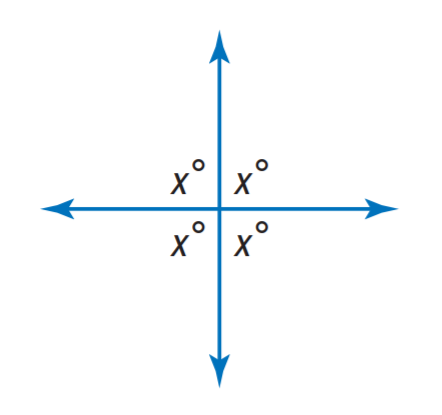

Predicted Answer: To find the value of \( x \), let's analyze the given diagram step by step.

1. The diagram shows four angles, each labeled as \( x^\circ \), arranged around a point.
2. The angles around a point add up to \( 360^\circ \).

Thus:
\[ x^\circ + x^\circ + x^\circ + x^\circ = 360^\circ \]

This can be simplified to:
\[ 4x = 360^\circ \]

To find \( x \), we divide both sides by 4:
\[ x = \frac{360^\circ}{4} \]
\[ x = 90^\circ \]

So, the correct option is:
\[ C \]

Therefore, the value of \( x \) is \( 90 \) degrees.


In [6]:
questions_to_display = [41]

for question in questions_to_display:
    print(f"Displaying predictions for question {question} across all datasets:")
    
    print("\nDataset: results_geometry_3k_baseline_direct")
    display_prediction(question, results_geometry_3k_baseline_direct, show_details=True)
    
    print("\nDataset: results_geometry_3k_baseline_cot")
    display_prediction(question, results_geometry_3k_baseline_cot, show_details=False)
    
    print("\nDataset: results_geometry_3k_finetuned")
    display_prediction(question, results_geometry_3k_finetuned, show_details=False)

    print("\nDataset: results_geometry_3k_gpto")
    display_prediction(question, results_geometry_3k_baseline_cot_gpto, show_details=True)
    
    print("\n" + "="*50 + "\n")

In [54]:
# Find items where the predicted answer is not one of A, B, C, or D for finetuned
invalid_predicted_answers_finetuned = [item for item in results_geometry_3k_finetuned if item['extracted_answer'] not in ['A', 'B', 'C', 'D']]

# Calculate the percentage of such items for finetuned
total_items_finetuned = len(results_geometry_3k_finetuned)
invalid_percentage_finetuned = (len(invalid_predicted_answers_finetuned) / total_items_finetuned) * 100

# Display the results for finetuned
print(f"Number of items with invalid predicted answers (finetuned): {len(invalid_predicted_answers_finetuned)}")
print(f"Percentage of items with invalid predicted answers (finetuned): {invalid_percentage_finetuned:.2f}%")

# Find items where the predicted answer is not one of A, B, C, or D for baseline_direct
invalid_predicted_answers_direct = [item for item in results_geometry_3k_baseline_direct if item['extracted_answer'] not in ['A', 'B', 'C', 'D']]

# Calculate the percentage of such items for baseline_direct
total_items_direct = len(results_geometry_3k_baseline_direct)
invalid_percentage_direct = (len(invalid_predicted_answers_direct) / total_items_direct) * 100

# Display the results for baseline_direct
print(f"Number of items with invalid predicted answers (baseline_direct): {len(invalid_predicted_answers_direct)}")
print(f"Percentage of items with invalid predicted answers (baseline_direct): {invalid_percentage_direct:.2f}%")

# Find items where the predicted answer is not one of A, B, C, or D for baseline_cot
invalid_predicted_answers_cot = [item for item in results_geometry_3k_baseline_cot if item['extracted_answer'] not in ['A', 'B', 'C', 'D']]

# Calculate the percentage of such items for baseline_cot
total_items_cot = len(results_geometry_3k_baseline_cot)
invalid_percentage_cot = (len(invalid_predicted_answers_cot) / total_items_cot) * 100

# Display the results for baseline_cot
print(f"Number of items with invalid predicted answers (baseline_cot): {len(invalid_predicted_answers_cot)}")
print(f"Percentage of items with invalid predicted answers (baseline_cot): {invalid_percentage_cot:.2f}%")

# Compare the percentages
print("\nComparison of invalid predicted answer percentages:")
print(f"Finetuned vs Baseline Direct: {'Higher' if invalid_percentage_finetuned > invalid_percentage_direct else 'Lower or Equal'}")
print(f"Finetuned vs Baseline CoT: {'Higher' if invalid_percentage_finetuned > invalid_percentage_cot else 'Lower or Equal'}")
print(f"Baseline Direct vs Baseline CoT: {'Higher' if invalid_percentage_direct > invalid_percentage_cot else 'Lower or Equal'}")


Number of items with invalid predicted answers (finetuned): 66
Percentage of items with invalid predicted answers (finetuned): 10.98%
Number of items with invalid predicted answers (baseline_direct): 7
Percentage of items with invalid predicted answers (baseline_direct): 1.16%
Number of items with invalid predicted answers (baseline_cot): 14
Percentage of items with invalid predicted answers (baseline_cot): 2.33%

Comparison of invalid predicted answer percentages:
Finetuned vs Baseline Direct: Higher
Finetuned vs Baseline CoT: Higher
Baseline Direct vs Baseline CoT: Lower or Equal


evaluated

In [8]:
# Assuming `results_geometry_3k_finetuned` is a list of dictionaries where each dictionary represents an item
# and contains a key 'final_answer_score' with a float value.

import json

# Load the JSON data from the file
with open("dataset/training/geometry_3k/geometry_3k_evaluated_20240526_013455.json", "r") as file:
    geometry_3k_evaluated = json.load(file)


# Count the number of items with final_answer_score == 1
items_with_score_1 = [item for item in geometry_3k_evaluated if item.get('final_answer_score') == 1]
count_score_1 = len(items_with_score_1)

# Calculate the total number of items
total_items = len(geometry_3k_evaluated)

# Calculate the percentage of items with final_answer_score == 1
percentage_score_1 = (count_score_1 / total_items) * 100 if total_items > 0 else 0

# Display the results
print(f"Number of items with final_answer_score == 1: {count_score_1}")
print(f"Percentage of items with final_answer_score == 1: {percentage_score_1:.2f}%")

# Initialize buckets for answer_score ranges
buckets = {
    '0-0.2': 0,
    '0.2-0.4': 0,
    '0.4-0.6': 0,
    '0.6-0.8': 0,
    '0.8-1.0': 0
}

# Count the number of items in each bucket
for item in geometry_3k_evaluated:
    score = item.get('average_score', 0)
    if isinstance(score, (int, float)):  # Check if score is a number
        if 0 <= score < 0.2:
            buckets['0-0.2'] += 1
        elif 0.2 <= score < 0.4:
            buckets['0.2-0.4'] += 1
        elif 0.4 <= score < 0.6:
            buckets['0.4-0.6'] += 1
        elif 0.6 <= score < 0.8:
            buckets['0.6-0.8'] += 1
        elif 0.8 <= score <= 1.0:
            buckets['0.8-1.0'] += 1

# Initialize buckets for answer_score ranges for items with final_answer_score == 1
buckets_score_1 = {
    '0-0.2': 0,
    '0.2-0.4': 0,
    '0.4-0.6': 0,
    '0.6-0.8': 0,
    '0.8-1.0': 0
}

# Count the number of items in each bucket for items with final_answer_score == 1
for item in items_with_score_1:
    score = item.get('average_score', 0)
    if isinstance(score, (int, float)):  # Check if score is a number
        if 0 <= score < 0.2:
            buckets_score_1['0-0.2'] += 1
        elif 0.2 <= score < 0.4:
            buckets_score_1['0.2-0.4'] += 1
        elif 0.4 <= score < 0.6:
            buckets_score_1['0.4-0.6'] += 1
        elif 0.6 <= score < 0.8:
            buckets_score_1['0.6-0.8'] += 1
        elif 0.8 <= score <= 1.0:
            buckets_score_1['0.8-1.0'] += 1

# Display the bucket results for items with final_answer_score == 1
print("\nDistribution of answer_score for items with final_answer_score == 1:")
for range, count in buckets_score_1.items():
    print(f"{range}: {count} items")


# Display the bucket results
print("\nDistribution of answer_score:")
for range, count in buckets.items():
    print(f"{range}: {count} items")


Number of items with final_answer_score == 1: 1271
Percentage of items with final_answer_score == 1: 60.50%

Distribution of answer_score for items with final_answer_score == 1:
0-0.2: 4 items
0.2-0.4: 13 items
0.4-0.6: 68 items
0.6-0.8: 186 items
0.8-1.0: 999 items

Distribution of answer_score:
0-0.2: 68 items
0.2-0.4: 51 items
0.4-0.6: 198 items
0.6-0.8: 420 items
0.8-1.0: 1358 items


experiment 2